## Hello World from Qiskit

_course: quantum cyrptography for beginners
<br>date: 15 august 2024
<br>author: burton rosenberg_

This [hello world](https://docs.quantum.ibm.com/guides/hello-world) notebook is a tutorial program from IBM. 
In it we build a simple two qubit circuit consisting of a Hadamard controling a CNOT, that results in the 
maximally entangled EPR pair.

It assumes you have already [installed qiskit](https://docs.quantum.ibm.com/guides/install-qiskit).

The Qiskit package is object oriented. You instantial a `QuantumCircuit` object with a given number of qubits
and classical bits and then apply message calls to it that add to the circuit as the next step in the computation. 
What is added can be an gate, a barrier or a measurement.

- [Construct circuits](https://docs.quantum.ibm.com/guides/construct-circuits)

It might be helpful to keep in mind the qubit numbering convention,

- [Bit-ordering in the Qiskit SDK](https://docs.quantum.ibm.com/guides/bit-ordering)

This tutorial measures the outcome using **Observables**. Some information about that is found in,

- [Specify observables in the Pauli basis](https://docs.quantum.ibm.com/guides/specify-observables-pauli)
- [Overview of operator classess](https://docs.quantum.ibm.com/guides/operators-overview)

The result is that for an EPR pair, if one qubit is measured, the output of the other is determined. 
This results in complete correlation if the two qubits are measured with the same observable.
However there is no correlation if they are measure in orthogonal basis.



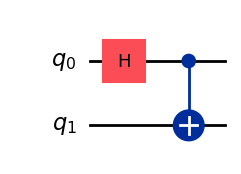

In [1]:
#
# the qiskit hello-world program (see URL below)
#
# author: bjr
# last-update:
#     15 aug 2024 -bjr
# github: 
#     https://github.com/csc-courses/csc685.git
#
# install with https://docs.quantum.ibm.com/guides/install-qiskit
# run the simulator version of https://docs.quantum.ibm.com/guides/hello-world
#

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")


In [2]:
# Set up six different observables.
from qiskit.quantum_info import SparsePauliOp
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [3]:
 
# Use the following code instead if you want to run on a simulator:
 
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = FakeAlmadenV2()
estimator = Estimator(backend)
 
# Convert to an ISA circuit and layout-mapped observables.
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()
 
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
 
job_result = job.result()
 
# This is the result from our single pub, which had five observables,
# so contains information on all five.
 
pub_result = job.result()[0]


/opt/venv/qiskit20/lib/python3.12/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


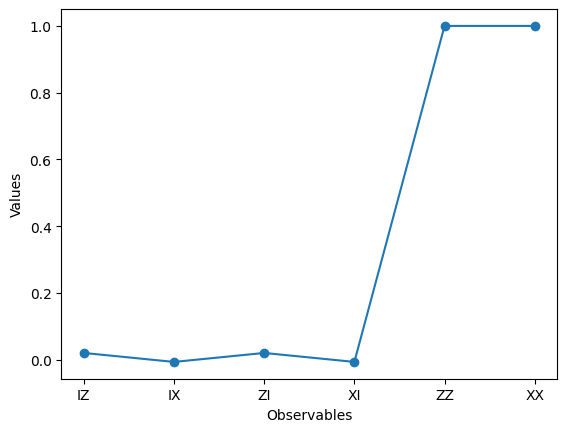

In [4]:
# Plot the result
 
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()


https://docs.quantum.ibm.com/guides/bit-ordering


In [20]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all() 
qc.draw("text")    # or the default with no paramter, or using output=


┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

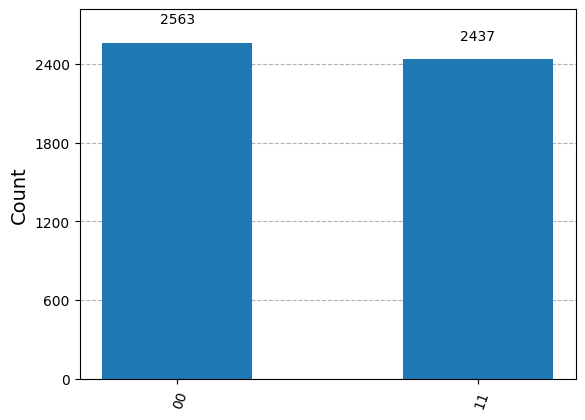

In [22]:

backend = BasicSimulator()
result = backend.run(qc, shots=5000).result()
counts = result.get_counts()
plot_histogram(counts)
